In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import requests
import pandas_ta as ta
import matplotlib.pyplot as plt
from termcolor import colored as cl
import math 

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

In [38]:
eda = pd.read_excel(r"D:\Data\hpg.xls", engine='xlrd')
eda = pd.DataFrame(eda)
eda = eda.reset_index()
eda = eda.sort_values(by='index', ascending = False)
eda['Date'] = pd.to_datetime(eda['Date'])
eda = eda.drop(['index','Time'],axis=1)
eda

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,Date,Open,High,Low,Close,Volume
1099,2019-08-15,10000,10100,9920,10100,6880640
1098,2019-08-16,10100,10200,9960,10050,8856190
1097,2019-08-19,10000,10150,10000,10050,2540900
1096,2019-08-20,10050,10150,9880,9960,4790700
1095,2019-08-21,9960,10100,9920,10100,4819580
...,...,...,...,...,...,...
4,2023-12-26,27400,27900,27400,27800,33743700
3,2023-12-27,27850,28000,27750,27750,19852100
2,2023-12-28,27750,28200,27650,27950,31308200
1,2023-12-29,27950,28100,27800,27950,20467100


In [39]:
eda[['dcl', 'dcm', 'dcu']] = eda.ta.donchian(lower_length = 40, upper_length = 50)
eda = eda.set_index('Date')
eda.index = pd.to_datetime(eda.index)
eda['Close'] = round(eda['Close'], 2)
eda.tail()

,Open,High,Low,Close,Volume,dcl,dcm,dcu
Date,,,,,,,,
2023-12-26,27400,27900,27400,27800,33743700,22950.0,25600.0,28250.0
2023-12-27,27850,28000,27750,27750,19852100,24100.0,26175.0,28250.0
2023-12-28,27750,28200,27650,27950,31308200,24750.0,26500.0,28250.0
2023-12-29,27950,28100,27800,27950,20467100,25200.0,26725.0,28250.0
2024-01-02,28100,28150,27850,27950,3725300,25450.0,26850.0,28250.0


Text(0, 0.5, 'Close')

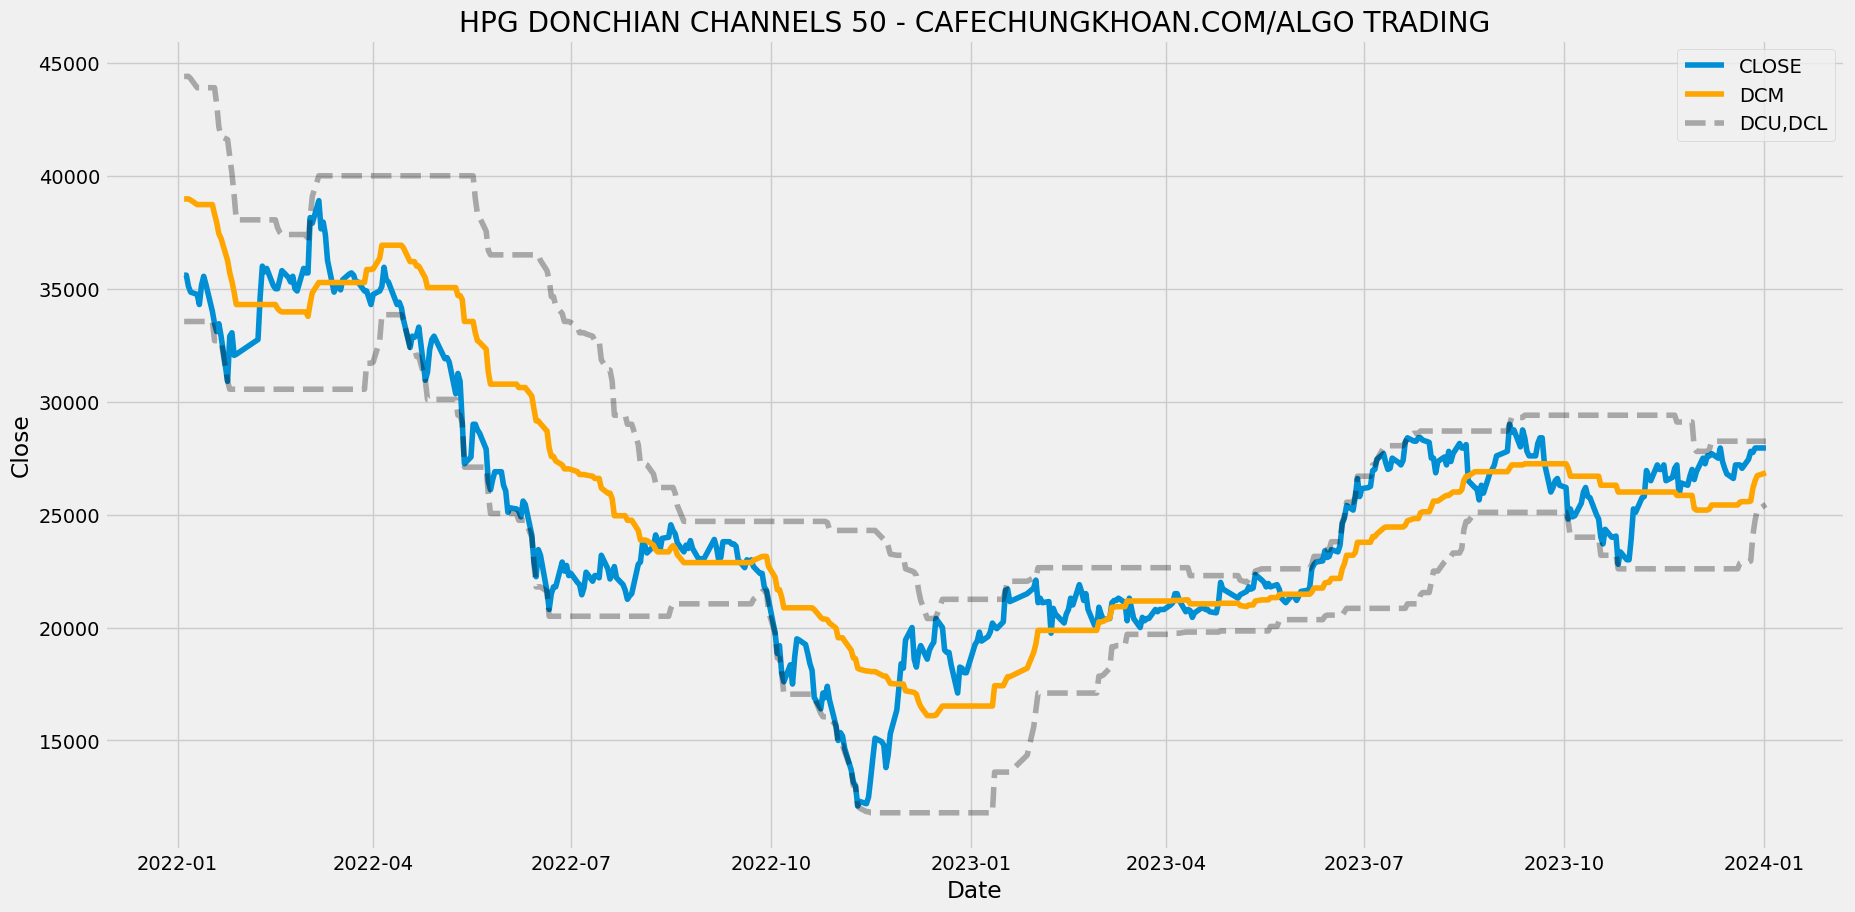

In [36]:
plt.plot(eda[-500:].Close, label = 'CLOSE')
plt.plot(eda[-500:].dcl, color = 'black', linestyle = '--', alpha = 0.3)
plt.plot(eda[-500:].dcm, color = 'orange', label = 'DCM')
plt.plot(eda[-500:].dcu, color = 'black', linestyle = '--', alpha = 0.3, label = 'DCU,DCL')
plt.legend()
plt.title('HPG DONCHIAN CHANNELS 50 - CAFECHUNGKHOAN.COM/ALGO TRADING')
plt.xlabel('Date')
plt.ylabel('Close')

In [40]:
# BACKTEST

def implement_strategy(eda, investment):
    
    in_position = False
    equity = investment	
    
    for i in range(3, len(eda)):
        if eda['High'][i] == eda['dcu'][i] and in_position == False:
            no_of_shares = math.floor(equity/eda.Close[i])
            equity -= (no_of_shares * eda.Close[i])
            in_position = True
            print(cl('MUA: ', color = 'green', attrs = ['bold']), 
                  f'{no_of_shares} cổ phiếu mua tại {eda.Close[i]} vào {str(eda.index[i])[:10]}')
        elif eda['Low'][i] == eda['dcl'][i] and in_position == True:
            equity += (no_of_shares * eda.Close[i])
            in_position = False
            print(cl('BÁN: ', color = 'red', attrs = ['bold']), 
                  f'{no_of_shares} cổ phiếu bán tại {eda.Close[i]} vào {str(eda.index[i])[:10]}')
    if in_position == True:
        equity += (no_of_shares * eda.Close[i])
        print(cl(f'\nChốt NAV tại giá {eda.Close[i]} vào {str(eda.index[i])[:10]}', attrs = ['bold']))
        in_position = False

    earning = round(equity - investment, 2)
    roi = round(earning / investment * 100, 2)
    print(cl(f'EARNING: {earning} ; ROI: {roi}%', attrs = ['bold']))
    
implement_strategy(eda, 100000000)


MUA:  10080 cổ phiếu mua tại 9920 vào 2019-11-11
BÁN:  10080 cổ phiếu bán tại 9880 vào 2020-02-24
MUA:  9669 cổ phiếu mua tại 10300 vào 2020-05-07
BÁN:  9669 cổ phiếu bán tại 34200 vào 2021-07-12
MUA:  8457 cổ phiếu mua tại 39100 vào 2021-09-20
BÁN:  8457 cổ phiếu bán tại 38050 vào 2021-11-18
MUA:  8435 cổ phiếu mua tại 38150 vào 2022-03-03
BÁN:  8435 cổ phiếu bán tại 33600 vào 2022-04-15
MUA:  13893 cổ phiếu mua tại 20400 vào 2022-12-16
BÁN:  13893 cổ phiếu bán tại 26150 vào 2023-08-22
MUA:  12527 cổ phiếu mua tại 29000 vào 2023-09-06
BÁN:  12527 cổ phiếu bán tại 24800 vào 2023-10-03
MUA:  11257 cổ phiếu mua tại 27600 vào 2023-12-07

Chốt NAV tại giá 27950 vào 2024-01-02
EARNING: 214638100 ; ROI: 214.64%
